## Welcome!!
This is based on the Adult dataset from the UCI Machine Learning collection. It contains census information about adult things like jobs, education, relationship, etc. and whether or not the make above 50k dollars per year. The point of this dataset is to attempt to train a model to predict someones income status (above or below 50k) based on the attributes that they provide (adult things). The general plan for this is to look at the data briefly (really briefly), and then preprocess, fit, tune, and complete it. Lets begin!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('./data/adult.data')
colnames = ['Age','Employment','Number of People','Education', 'Education Numerical', 'Marital Status','Occupation','Relationship','Race','Sex','Capital Gains', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Income 50k']
df.columns = colnames

df.head()

,Age,Employment,Number of People,Education,Education Numerical,Marital Status,Occupation,Relationship,Race,Sex,Capital Gains,Capital Loss,Hours Per Week,Native Country,Income 50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
df["Lower Income Count"] = df.apply(lambda row: row[2] if row[14] == " <=50K" else 0, axis=1)
df["Upper Income Count"] = df.apply(lambda row: row[2] if row[14] == " >50K" else 0, axis=1)
df.head()

,Age,Employment,Number of People,Education,Education Numerical,Marital Status,Occupation,Relationship,Race,Sex,Capital Gains,Capital Loss,Hours Per Week,Native Country,Income 50k,Lower Income Count,Upper Income Count
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,83311,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,215646,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,234721,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,338409,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,284582,0


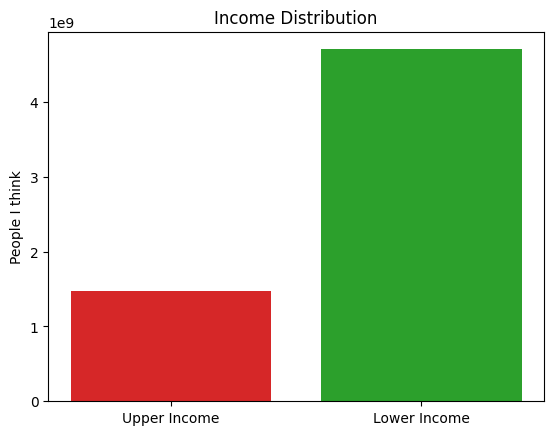

In [3]:
fig, ax = plt.subplots()
ax.bar(["Upper Income", "Lower Income"],[df["Upper Income Count"].sum(), df["Lower Income Count"].sum()], label=["Upper Income", "Lower Income"], color=["tab:red","tab:green"])
ax.set_title("Income Distribution")
ax.set_ylabel("People I think")
plt.show()

In [4]:
dfvalid = pd.read_csv('./Data/adult.test', )
dfvalid.columns = colnames
dfvalid["Income 50k"] = dfvalid.apply(lambda row: row[-1][:-1].strip(), axis=1)  # There is a period at the end of 50k for some reason
df["Income 50k"] = df.apply(lambda row: row[-3].strip(), axis= 1)
dfvalid.head()

,Age,Employment,Number of People,Education,Education Numerical,Marital Status,Occupation,Relationship,Race,Sex,Capital Gains,Capital Loss,Hours Per Week,Native Country,Income 50k
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df.head()

,Age,Employment,Number of People,Education,Education Numerical,Marital Status,Occupation,Relationship,Race,Sex,Capital Gains,Capital Loss,Hours Per Week,Native Country,Income 50k,Lower Income Count,Upper Income Count
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,83311,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,215646,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,234721,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,338409,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,284582,0


## Conversion to Numerical Form
ML Models like this don't do strings really well, so we want to convert all of the categories into basic integers. Also, in this dataset the validation set contains some extra symbols (like a '?' in the Employment column) that the test data doesn't so we also want to convert that one into a number so it doesn't mess us up in the end.

In [17]:
all_entries = {column:{entry:i for i, entry in  enumerate(dfvalid[column].unique())} for column in dfvalid.columns}

for key, colmap in all_entries.items():
    for entry in df[key].unique():
        if entry not in colmap.keys():
            colmap[entry] = max(colmap.values()) + 1
        else:
            pass
try:
    df = df.drop(["Upper Income Count", "Lower Income Count"], axis=1)
    df = df.drop("Education", axis=1)
    dfvalid = dfvalid.drop("Education", axis=1)
except:
    pass
for index, column in enumerate(dfvalid.columns):
   
    if type(dfvalid[column][0]) == np.int64:
        pass
    else:
        df[column] = df.apply(lambda row: all_entries[column][row[index]], axis=1)
        dfvalid[column] = dfvalid.apply(lambda row: all_entries[column][row[index]], axis=1)

## Data Split and Model
Now that we have our data in numerical form, it can be fed into a model. This notebook uses a Random Forest Classifier because it generally performs the best, and also because I don't have any other projects that show this design off. The general idea for a ML Model is to split the data into two categories; train and test, and then feed the training data into the model to give it information so that it can best predict our answers. It then tests it's model with the test data, before we eventually validate it with a seperate dataset. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x = np.array(df.drop("Income 50k", axis=1))
Class = np.array(df["Income 50k"])
x_train, x_test, y_train, y_test = train_test_split(x, Class, test_size=0.75, random_state=29)
x_valid = np.array(dfvalid.drop("Income 50k", axis=1))
y_valid = np.array(dfvalid["Income 50k"])
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train, y_train)
print(f"Accuracy of {round(model.score(x_test, y_test), 4) * 100}%")


Accuracy of 79.19%


## Hyperparameter Testing
Now, we need to test to see which parameters of our model make it perform the best.


In [10]:
#HyperParam Testing

Test_splits = [0.05 + 0.05*i for i in range(1,19)]
max_depth = [i for i in range(1,11)]
scores = []
for splitsize in Test_splits:
    x_train, x_test, y_train, y_test = train_test_split(x, Class, test_size=splitsize, random_state=29)
    for depth in max_depth:
        model = RandomForestClassifier(max_depth=depth, random_state=0)
        model.fit(x_train, y_train)
        hist = model.score(x_test, y_test)
        print(f'Accuracy of {round(hist,4) * 100}% for model with test {splitsize} and depth {depth}')
        scores.append([splitsize, depth, hist])


Accuracy of 77.36% for model with test 0.1 and depth 1
Accuracy of 79.94% for model with test 0.1 and depth 2
Accuracy of 84.28% for model with test 0.1 and depth 3
Accuracy of 84.86% for model with test 0.1 and depth 4
Accuracy of 85.2% for model with test 0.1 and depth 5
Accuracy of 85.66% for model with test 0.1 and depth 6
Accuracy of 85.66% for model with test 0.1 and depth 7
Accuracy of 86.09% for model with test 0.1 and depth 8
Accuracy of 85.92999999999999% for model with test 0.1 and depth 9
Accuracy of 86.09% for model with test 0.1 and depth 10
Accuracy of 75.92999999999999% for model with test 0.15000000000000002 and depth 1
Accuracy of 79.34% for model with test 0.15000000000000002 and depth 2
Accuracy of 83.75% for model with test 0.15000000000000002 and depth 3
Accuracy of 84.3% for model with test 0.15000000000000002 and depth 4
Accuracy of 84.73% for model with test 0.15000000000000002 and depth 5
Accuracy of 85.14% for model with test 0.15000000000000002 and depth 6
A

### Graph and Comparison
Now that we have a LOT of graphs, it's time to compare. While we could do this without graphs, that isn't as pretty to look at!!

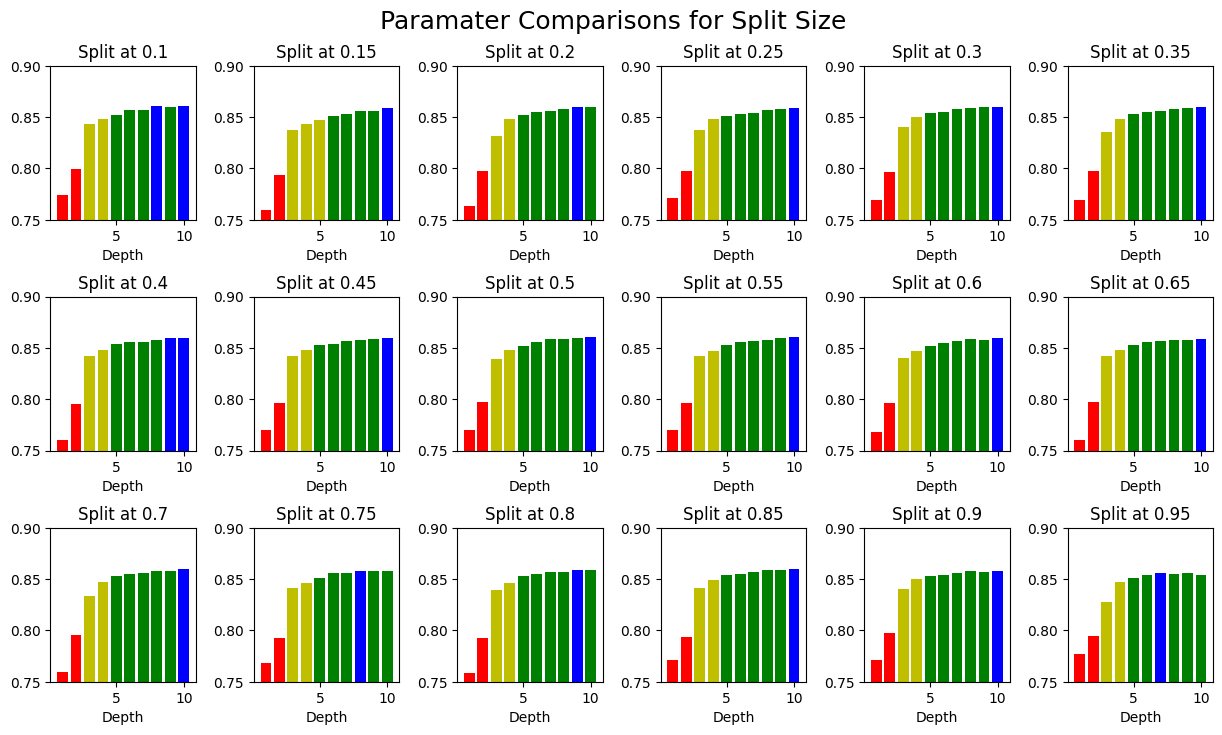

In [11]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Paramater Comparisons for Split Size", fontsize=18, y=0.95)
groupsdepth = [[] for i in range(10)]
groupssplit = [[] for i in range(18)]
#grouping
for num, score in enumerate(scores):
    groupssplit[num // 10].append(score)
    groupsdepth[score[1] - 1].append(score)
#Plotting
xticks = np.arange(10)
ytick = [0.75 + 0.05*n for n in range(4)]
setcolor = lambda val, lister: 'b' if val == max(lister) else 'r' if val < 0.825 else 'y' if val < 0.85 else 'g' 
for axis, group in enumerate(groupssplit):
    split_x = [round(score[1], 2) for score in group]
    split_y = [score[2] for score in group]
    colorkey = [setcolor(val, split_y) for val in split_y]
    sub = plt.subplot(3,6, axis + 1)
    sub.bar(split_x,split_y, color=colorkey)
    sub.set_title(f'Split at {round(group[0][0], 2)}')
    sub.set_xlabel("Depth")
    sub.set_ylim(0.75,0.9)



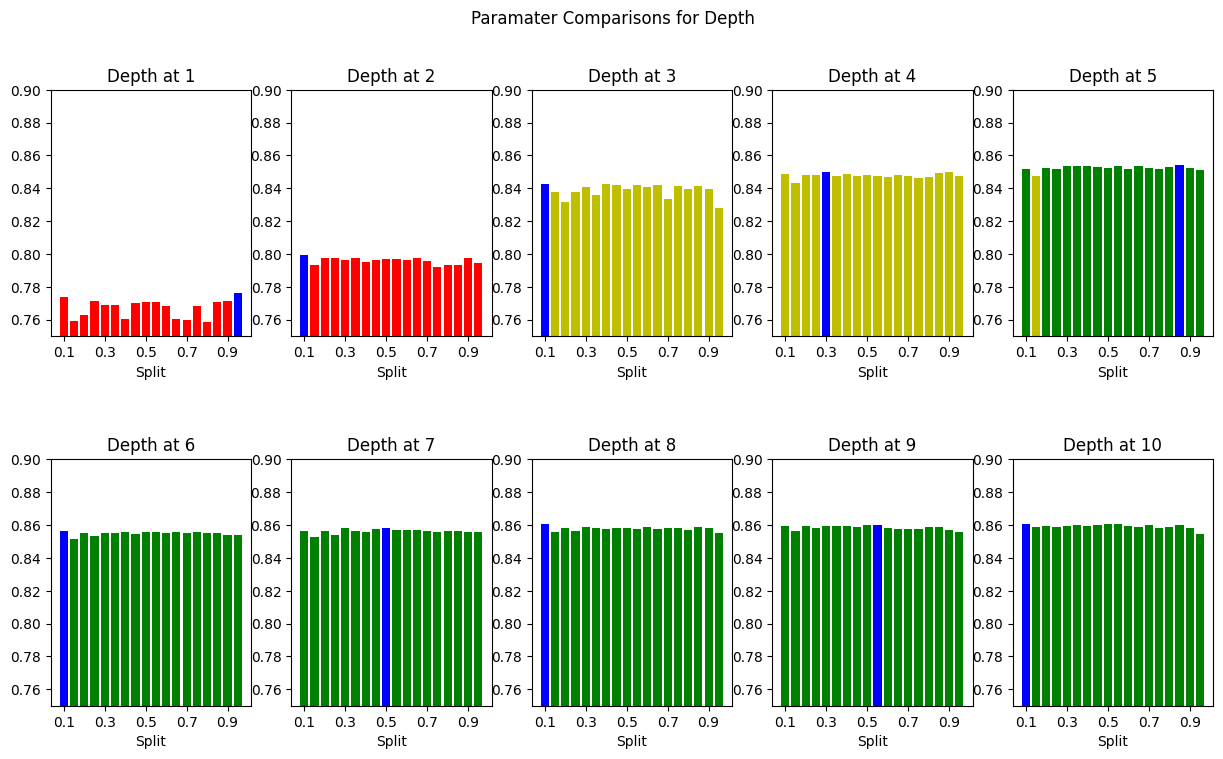

In [12]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Paramater Comparisons for Depth")
xticks = np.arange(0.1,1,0.2)
for axis, group in enumerate(groupsdepth):
    split_x = [round(score[0],2) for score in group]
    split_y = [score[2] for score in group]    
    colorkey = [setcolor(val, split_y) for val in split_y]
    sub = plt.subplot(2,5, axis + 1)
    sub.bar(split_x,split_y, color=colorkey, width=0.04)
    sub.set_title(f'Depth at {round(group[0][1], 2)}')
    sub.set_xlabel("Split")
    sub.set_ylim(0.75,0.9)
    sub.set_xticks(xticks)
    

### Validation
Now, based on the two sets of graphs we produced above, it is decently clear to see that depth 10 is the best, and the best in depth ten is a split size of 0.1. We use these paramaters for a final model and validate our hypothesis.

In [15]:
model = RandomForestClassifier(max_depth=10, random_state=0)
x = np.array(df.drop("Income 50k", axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, Class, test_size=0.1, random_state=29)
x_valid = np.array(dfvalid.drop("Income 50k", axis=1))
y_valid = np.array(dfvalid["Income 50k"])
model.fit(x_train, y_train)
print(f'Final Accuracy at {round(model.score(x_valid, y_valid), 4) * 100}%')

Final Accuracy at 86.3%


# Thanks for reading! :)
Below this is just a test, I just was curious on how this would work. Thanks for reading!


In [16]:
#Only Bachelors and Race

dfexp = df[["Education Numerical", "Race", "Income 50k"]]



x = dfexp.drop("Income 50k", axis = 1)
Class = np.array(dfexp["Income 50k"])
x_train, x_test, y_train, y_test = train_test_split(x, Class, test_size=0.1, random_state=29)
x_valid = np.array(dfvalid.drop("Income 50k", axis=1))
y_valid = np.array(dfvalid["Income 50k"])
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(x_train, y_train)
print(f"Accuracy of {round(model.score(x_test, y_test), 4) * 100}%")

Accuracy of 77.89%
